In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


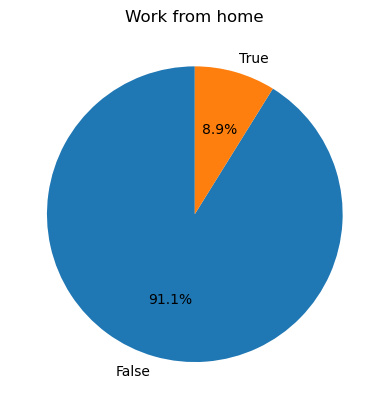

In [11]:
df['job_work_from_home'].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%')
plt.title('Work from home')
plt.ylabel('')
plt.show()

In [12]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


<function matplotlib.pyplot.show(close=None, block=None)>

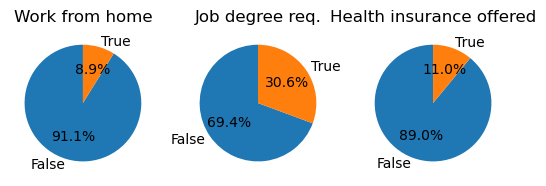

In [17]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': "Work from home",
    'job_no_degree_mention': 'Job degree req.',
    'job_health_insurance': 'Health insurance offered'
}

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

plt.show

In [18]:
df_DA = df.copy()

Text(0.5, 1.0, 'Proportion of Data Analyst Jobs Mentioning Health Insurance')

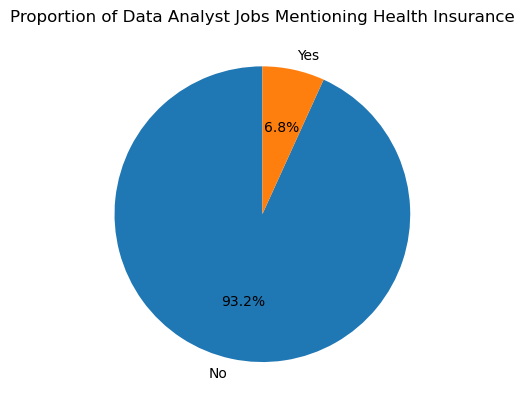

In [25]:
df_DA = df_DA[df_DA['job_title_short'] == 'Data Analyst']
df_DA['job_work_from_home'].value_counts()
plt.pie(df_DA['job_work_from_home'].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['No', 'Yes'])
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')

job_schedule_type
Full-time    701727
Part-time      7881
Name: count, dtype: int64


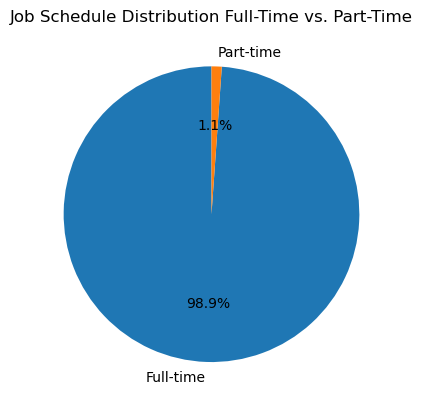

In [31]:
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')].copy()
job_schedule_counts = df_ft_pt['job_schedule_type'].value_counts()
print(job_schedule_counts)
plt.pie(df_ft_pt['job_schedule_type'].value_counts(), startangle = 90, autopct = '%1.1f%%', labels=job_schedule_counts.index)
plt.title('Job Schedule Distribution Full-Time vs. Part-Time')
plt.show()

In [32]:
df_US = df[df['job_location'] == "United States"].copy()

In [35]:
degree_counts = df_US['job_no_degree_mention'].value_counts()
degree_counts

job_no_degree_mention
False    6865
True      589
Name: count, dtype: int64

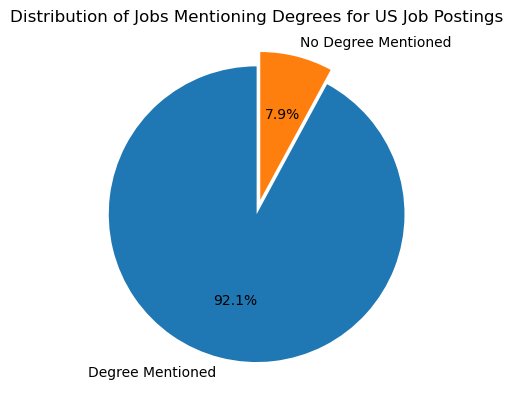

In [43]:
plt.pie(degree_counts, labels=['Degree Mentioned', 'No Degree Mentioned'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()